#### Lab 2 - Hyperparameters

umu-id: anth2786

The first MNIST part of the code is based on code from:

- Jeff Heaton: https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_06_2_cnn.ipynb

- Aurélien Géron, Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow, 2019

- https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel regarding getting the confusion matrix working

In [1]:
import tensorflow as tf
print('Tensorflow version:', tf.__version__)

import tensorflow.keras
print('Keras version:', tensorflow.keras.__version__)

# Import Early stopping which stops traing whan a monitored metric has been reached
from tensorflow.keras.callbacks import EarlyStopping
# Import Dense, which is a "normal" NN layer with the function output = activation(dot(input, kernel) + bias)
from tensorflow.keras.layers import Dense
# Import Dropout. Dropout prvents overfitting by applying 0 as input units randomly, during trainng (only training)
from tensorflow.keras.layers import Dropout
# Import Regularizers. Makes it possible to apply penalties on activity, bias or kernel. It is applied per layer
from tensorflow.keras import regularizers




Tensorflow version: 2.3.1
Keras version: 2.4.0


In [2]:
# Import the Fashoin MNIST dataset, which is part of Keras
from tensorflow.keras.datasets import fashion_mnist

# Get the data from the Keras Database
(x_train0, y_train0), (x_test, y_test) = fashion_mnist.load_data()
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


#### Split the training data into traning and validation

In [3]:
import sklearn
# import a method to split traning data into two parts; training and validation data
from sklearn.model_selection import train_test_split

# Split the training set into a trainng and a validation set (15% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train0, y_train0, test_size = 0.15)

#train_no,x,y = x_train.shape
#test_no,x,y = x_test.shape
#val_no,x,y = x_val.shape

#if (len(y_train) != len(x_train)) : print('Number of training labels do not match the data')
#if (len(y_test) != len(x_test)) : print('Number of test labels do not match the data')
#if (len(y_val) != len(x_val)) : print('Number of validation labels do not match the data')

# Print the shapes of the data
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train (Labels): {}".format(y_train.shape))
print("Labels: {}".format(y_train))
print()
print("Shape of x_val: {}".format(x_val.shape))
print("Shape of y_val (Labels): {}".format(y_val.shape))
print("Labels: {}".format(y_val))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test (Labels): {}".format(y_test.shape))
print("Labels: {}".format(y_test))
print()



Shape of x_train: (51000, 28, 28)
Shape of y_train (Labels): (51000,)
Labels: [4 3 2 ... 9 5 8]

Shape of x_val: (9000, 28, 28)
Shape of y_val (Labels): (9000,)
Labels: [2 9 3 ... 3 0 5]

Shape of x_test: (10000, 28, 28)
Shape of y_test (Labels): (10000,)
Labels: [9 2 1 ... 8 1 5]



#### Display the Apparel as text

In [4]:
# Display as text with the help of Pandas
from IPython.display import display
import pandas as pd

# Choose an image to display, from the training set
image_number = 0
single = x_train[image_number]

# Print which number and the shape of it
print("Image number: ".format(image_number))
print("Shape for single: {}".format(single.shape))

# Print the values of each pixel from the image
pd.set_option('display.max_columns', 27)
pd.set_option('display.max_rows', 27)
pd.DataFrame(single.reshape(28,28))

Image number: 
Shape for single: (28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,...,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,1,0,1,0,1,8,5,3,...,11,8,7,0,0,1,1,0,0,1,0,0,0
1,0,0,0,0,0,0,5,0,0,5,16,11,8,...,11,95,35,2,0,0,2,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,155,213,7,9,94,...,116,73,2,61,103,0,0,0,1,0,0,0,0
3,0,0,0,0,0,3,130,187,239,226,8,2,41,...,38,0,0,242,215,165,89,0,0,1,0,0,0
4,0,0,0,0,22,215,242,231,219,229,255,242,203,...,178,170,181,213,209,219,225,140,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,0,0,113,212,198,206,0,216,222,213,217,218,222,...,198,183,191,177,233,44,12,236,182,201,96,0,0
24,0,0,107,215,205,223,0,213,218,199,196,190,189,...,172,166,163,163,197,58,0,214,197,190,90,0,0
25,0,0,122,212,195,209,0,115,236,232,234,225,222,...,216,205,212,212,242,0,0,205,186,179,107,0,0
26,0,0,146,227,220,178,0,0,44,95,115,136,153,...,120,101,92,72,3,0,0,213,223,202,125,0,0


#### Display the Apparel

Image (#0): Which is labeled '4'


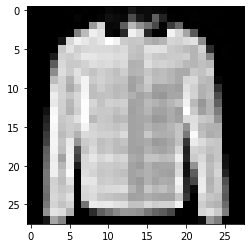

In [5]:
# Display as image with the help of matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Choose an image from the train set (the same as above)
a = x_train[image_number]

# convert the image data to a picture
plt.imshow(a, cmap='gray', interpolation='nearest')

# Print it
print("Image (#{}): Which is labeled '{}'".format(image_number,y_train[image_number]))

#### Display a random set of images

<Figure size 432x288 with 0 Axes>

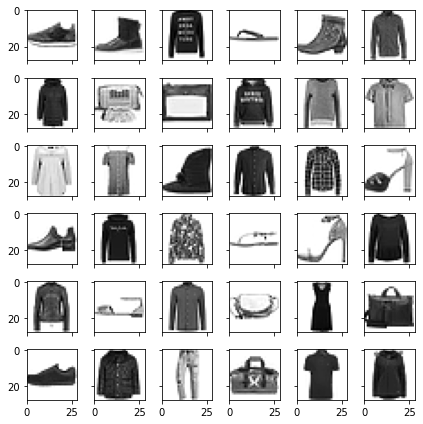

In [6]:
import random

# Choose the images at random 
ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)

# Extract the images and put them into a matrix sample_images
sample_images = x_train[random_indices, :]

# Clear the current matplotlib figure
plt.clf()

# Make small axes for the images
fig, axes = plt.subplots(ROWS,ROWS, 
                         figsize=(ROWS,ROWS),
                         sharex=True, sharey=True) 

# Plot the images in a matrix ROWS x ROWS
for i in range(ROWS*ROWS):
    subplot_row = i//ROWS 
    subplot_col = i%ROWS

    # plot the subaxes'
    ax = axes[subplot_row, subplot_col]

    # Pick the image in the row
    plottable_image = np.reshape(sample_images[i,:], (28,28))
    
    # Make an image
    ax.imshow(plottable_image, cmap='gray_r')
    
    # Set the numerical bounds of the x-axis
    ax.set_xbound([0,28])

# plot it to the webpage
plt.tight_layout()
plt.show()

In [7]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m:>02}:{s:>05.2f}"

#### Training/Fitting CNN -Fashion

In [8]:
# Use Keras that come with Tensorflow and that is not compatible with other Keras backends
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

# Define the number of classes in MNIST Fashion
num_classes = 10

# Define the image dimensions
img_rows, img_cols = 28, 28

# Change the data depending on if the images are using standard format with channels (color 
#    definition) last, or if it is defined first in the image definition

if K.image_data_format() == 'channels_first':
    # It is first, reshape the sets
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    # It is last, reshape the sets
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
# Define the image sets explicitly as float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Scale the image values to a range 0-1, which will make it work for Gradiend Descend
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print("Training samples: {}".format(x_train.shape[0]))
print("Test samples: {}".format(x_test.shape[0]))

# Convert class vectors to binary class matrices
#  It converts the labels vector to a matrix/numpy array that has columns equal to the number of categories
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)



x_train shape: (51000, 28, 28, 1)
Training samples: 51000
Test samples: 10000


In [9]:
import tensorflow as tf
import time

epochs = 12

batch_size = 128

#### MODEL B1: Different parameters - Change of strides (2,2)

In [9]:
model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [10]:
start_time = time.time()
history4 = model4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.1)



elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
359/359 - 34s - loss: 0.5581 - accuracy: 0.8020 - val_loss: 0.3332 - val_accuracy: 0.8804
Epoch 2/12
359/359 - 34s - loss: 0.3591 - accuracy: 0.8719 - val_loss: 0.2824 - val_accuracy: 0.8965
Epoch 3/12
359/359 - 34s - loss: 0.3061 - accuracy: 0.8887 - val_loss: 0.2543 - val_accuracy: 0.9078
Epoch 4/12
359/359 - 34s - loss: 0.2741 - accuracy: 0.9015 - val_loss: 0.2389 - val_accuracy: 0.9122
Epoch 5/12
359/359 - 34s - loss: 0.2485 - accuracy: 0.9087 - val_loss: 0.2288 - val_accuracy: 0.9133
Epoch 6/12
359/359 - 34s - loss: 0.2282 - accuracy: 0.9163 - val_loss: 0.2084 - val_accuracy: 0.9247
Epoch 7/12
359/359 - 34s - loss: 0.2088 - accuracy: 0.9236 - val_loss: 0.2131 - val_accuracy: 0.9239
Epoch 8/12
359/359 - 34s - loss: 0.1947 - accuracy: 0.9276 - val_loss: 0.2051 - val_accuracy: 0.9276
Epoch 9/12
359/359 - 34s - loss: 0.1800 - accuracy: 0.9327 - val_loss: 0.2040 - val_accuracy: 0.9265
Epoch 10/12
359/359 - 34s - loss: 0.1655 - accuracy: 0.9381 - val_loss: 0.2068 - val_accura

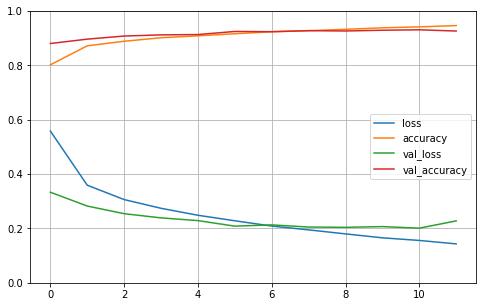

In [11]:
pd.DataFrame(history4.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [12]:
start_time = time.time()

score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 0.24315041303634644
Test accuracy: 0.9189000129699707
Elapsed time: 0:00:01.63


#### Model without Regularization

In [13]:
model20 = Sequential()
model20.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model20.add(Conv2D(64, (3, 3), activation='relu'))
model20.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#model2.add(Dropout(0.25))
model20.add(Flatten())
model20.add(Dense(128, activation='relu'))
#model2.add(Dropout(0.5))
model20.add(Dense(num_classes, activation='softmax'))
#model2.compile(loss='categorical_crossentropy', optimizer='adam',
model20.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
start_time = time.time()
history20 = model20.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.1)



elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
359/359 - 34s - loss: 0.4800 - accuracy: 0.8283 - val_loss: 0.3129 - val_accuracy: 0.8861
Epoch 2/12
359/359 - 34s - loss: 0.2834 - accuracy: 0.8957 - val_loss: 0.2879 - val_accuracy: 0.8971
Epoch 3/12
359/359 - 34s - loss: 0.2224 - accuracy: 0.9179 - val_loss: 0.2802 - val_accuracy: 0.8980
Epoch 4/12
359/359 - 34s - loss: 0.1791 - accuracy: 0.9343 - val_loss: 0.2467 - val_accuracy: 0.9188
Epoch 5/12
359/359 - 34s - loss: 0.1460 - accuracy: 0.9469 - val_loss: 0.2484 - val_accuracy: 0.9143
Epoch 6/12
359/359 - 34s - loss: 0.1177 - accuracy: 0.9579 - val_loss: 0.2539 - val_accuracy: 0.9214
Epoch 7/12
359/359 - 34s - loss: 0.0948 - accuracy: 0.9662 - val_loss: 0.2783 - val_accuracy: 0.9131
Epoch 8/12
359/359 - 34s - loss: 0.0744 - accuracy: 0.9739 - val_loss: 0.2760 - val_accuracy: 0.9190
Epoch 9/12
359/359 - 34s - loss: 0.0577 - accuracy: 0.9795 - val_loss: 0.3381 - val_accuracy: 0.9198
Epoch 10/12
359/359 - 34s - loss: 0.0474 - accuracy: 0.9836 - val_loss: 0.3394 - val_accura

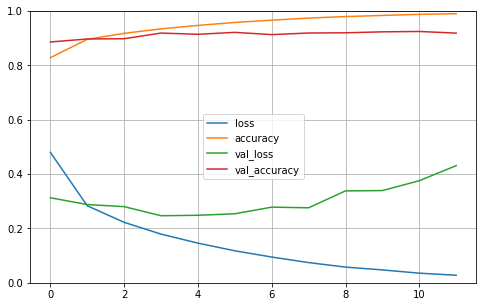

In [17]:
pd.DataFrame(history20.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
start_time = time.time()

score = model20.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 0.4343649446964264
Test accuracy: 0.9176999926567078
Elapsed time: 0:00:01.65


###### The model with regularization again

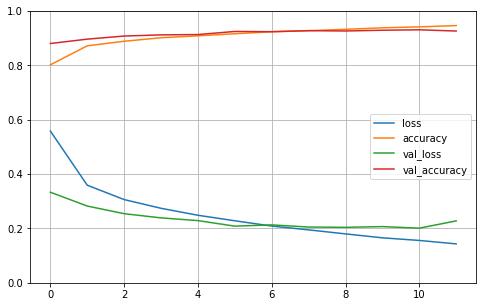

Test loss: 0.24315041303634644
Test accuracy: 0.9189000129699707


In [26]:
pd.DataFrame(history4.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

#### Part 1 - Analysis of the difference with and without regularization

The diagrams of test and validation loss and accuracy of the two models can be seen above

Note that as the training data is calculated during the epoch and the validation data after. The training data curve should be shifted 1/2 epoch to the left

In the model without regularization (model 4) we get the following test loss and accuracy
    Test loss: 0.4343649446964264 = ca 0,434
    Test accuracy: 0.9176999926567078 = ca 0,918
For the model with regularization (model 2) we get the follwing test loss and accuracy
    Test loss: 0.24315041303634644 = ca 0,243
    Test accuracy: 0.9189000129699707 = ca 0,919

The model with reg. have a much better test loss then without reg. at the same time as they have approx the same accuracy.  Looking at the graphs, you can see that the model with reg. start to overfit after the 7-8 epoch. Definently after the 10th when the validation loss starts to raise.

The model without reg. have a validation loss that start to raise already after the 4th Epoc. The overfitting is considereble in the model after 12 epochs.


###### Early stopping on the model with regularization

In [21]:
model5 = Sequential()
model5.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(num_classes, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    patience=0,
    mode='auto')

start_time = time.time()
history5 = model5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.1,
          callbacks=[early_stopping])



elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
359/359 - 34s - loss: 0.5540 - accuracy: 0.8047 - val_loss: 0.3335 - val_accuracy: 0.8814
Epoch 2/12
359/359 - 34s - loss: 0.3627 - accuracy: 0.8718 - val_loss: 0.2851 - val_accuracy: 0.8967
Epoch 3/12
359/359 - 34s - loss: 0.3070 - accuracy: 0.8903 - val_loss: 0.2658 - val_accuracy: 0.9049
Epoch 4/12
359/359 - 34s - loss: 0.2737 - accuracy: 0.9022 - val_loss: 0.2334 - val_accuracy: 0.9173
Epoch 5/12
359/359 - 34s - loss: 0.2485 - accuracy: 0.9090 - val_loss: 0.2307 - val_accuracy: 0.9145
Epoch 6/12
359/359 - 34s - loss: 0.2300 - accuracy: 0.9159 - val_loss: 0.2410 - val_accuracy: 0.9141
Elapsed time: 0:03:24.84


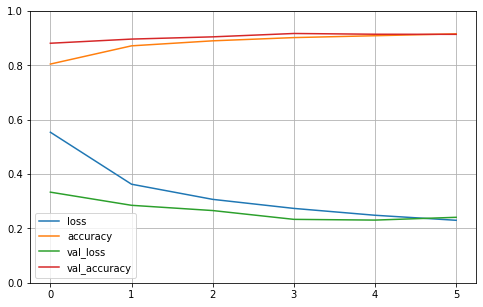

In [23]:
pd.DataFrame(history5.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [24]:
start_time = time.time()

score = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Test loss: 0.25949448347091675
Test accuracy: 0.906499981880188
Elapsed time: 0:00:01.63


###### Analysis

With Early stopping of the model with Reg. the training stops at the 5th epoch.
    Test loss: 0.25949448347091675 = ca 0,259
    Test accuracy: 0.906499981880188 = ca 0,906

The test accuracy does not come up to the same level, but stops where the test loss and the validation loss is close to eachother, which points in the direction that the model is not overfitted. This also makes the test loss a little bit higher then without Early stopping, but the validation loss is slightly lower (looking at the graphs).
    
    

## Part 2 - Keras Tuner

In [10]:
import os.path
epochs=12
batch_size = 128

from kerastuner.tuners import RandomSearch
from kerastuner.tuners import BayesianOptimization
from tensorflow import keras

###### RANDOM SEARCH

In [11]:
# MODEL BUILDING FUNCTION
def build_model(hp):
    
    
    
    modelE = Sequential()

    modelE.add(Conv2D(filters=hp.Choice('num_filters_1',values=[32,64,96], default=64),
                     kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    modelE.add(Conv2D(filters=hp.Choice('num_filters_2',values=[64,128,256], default=128),
                      kernel_size=(3, 3), 
                      activation='relu'))   
    modelE.add(MaxPooling2D(pool_size=(2, 2), 
                            strides=(2,2)
                           )
              )
    modelE.add(Dropout(rate=hp.Float(
                        'dropout_1',
                        min_value=0, max_value=0.6, default=0.2, step=0.2)
                        ))
    modelE.add(Flatten())
    modelE.add(Dense(units=hp.Int('dense_units', 
                                  min_value = 128, 
                                  max_value=128, 
                                  step=32), 
                     activation=hp.Choice('dense_activation', values=['relu', 'tanh', 'sigmoid'])))

    modelE.add(Dropout(rate=hp.Float(
                        'dropout_2',
                        min_value=0, max_value=0.5, default=0.25, step=0.25)
                        ))
    modelE.add(Dense(num_classes, activation='softmax'))

    modelE.summary()
    modelE.compile(loss='categorical_crossentropy', 
                   optimizer=keras.optimizers.Adam(
                    hp.Float(
                        'learning_rate',
                        min_value=1e-4,
                        max_value=1e-2,
                        sampling='LOG',
                        default=1e-3
                    )
                    ),
#                   optimizer='adam',
                  metrics=['accuracy'])

    print("compiled")
    return modelE


In [15]:
print("#################################################################################")
print("################### RANDOM MODEL ################################################")
print("#################################################################################")

tuner2 = RandomSearch(
    build_model,
    objective='val_accuracy',
#    objective='val_loss',
    max_trials=32,
    executions_per_trial=1,
    project_name='umu_labb2_part2',
    directory=os.path.normpath('C:/kerasloggs/')
    )

print("Search space summary ************ RANDOM ********************************************")
tuner2.search_space_summary()

#################################################################################
################### RANDOM MODEL ################################################
#################################################################################
INFO:tensorflow:Reloading Oracle from existing project C:\kerasloggs\umu_labb2_part2\oracle.json
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
___________________________________________

In [16]:
print("---------------------------------------------------------------------------------")
print("------------------ SEARCH -------------------------------------------------------")
print("---------------------------------------------------------------------------------")
print("")

print("#################################################################################")
print("################### RANDOM SEARCH ###############################################")
print("#################################################################################")

start_time = time.time()

early_stopping2 = EarlyStopping(
    patience=2,
    mode='auto')

tuner2.search(x_train, y_train,
          batch_size=batch_size,
          verbose=2,             
          epochs=epochs,
          validation_split=0.1,
            callbacks=[early_stopping2])




print("Search over")

models = tuner2.get_best_models(num_models=1)
best_model = models[0]

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))



---------------------------------------------------------------------------------
------------------ SEARCH -------------------------------------------------------
---------------------------------------------------------------------------------

#################################################################################
################### RANDOM SEARCH ###############################################
#################################################################################
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       221440    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       147712    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       221440    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       73984     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       73984     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       147712    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        55360     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       147712    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       221440    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       221440    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       147712    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       36992     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        55360     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        55360     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       73984     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       221440    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       221440    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       147712    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       221440    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

INFO:tensorflow:Oracle triggered exit
Search over
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropou

In [17]:
tuner2.results_summary()

In [29]:
print(best_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

The best model got the following parameters:

Trial summary
|-Trial ID: 7dffffa187f67827ef000b777ff67a5b
|-Score: 0.936470568180084
|-Best step: 0
Hyperparameters:
|-dense_activation: relu
|-dense_units: 128
|-dropout_1: 0.4
|-dropout_2: 0.5
|-learning_rate: 0.0006475221645231884
|-num_filters_1: 96
|-num_filters_2: 128

Now create a model like that and fit it to get loss + acc graph

In [45]:
modelBE1 = Sequential()
modelBE1.add(Conv2D(96, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
modelBE1.add(Conv2D(128, (3, 3), activation='relu'))
modelBE1.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
modelBE1.add(Dropout(0.4))
modelBE1.add(Flatten())
modelBE1.add(Dense(128, activation='relu'))
modelBE1.add(Dropout(0.5))
modelBE1.add(Dense(num_classes, activation='softmax'))             
modelBE1.compile(loss='categorical_crossentropy', 
                   optimizer=keras.optimizers.Adam(
                        learning_rate=0.0006475221645231884,
                       name='Adam'
                    ),
                  metrics=['accuracy'])

In [46]:
# Fit data to model
start_time = time.time()

early_stoppingBM = EarlyStopping(
    patience=2,
    mode='auto')

history_bestmodel = modelBE1.fit(x_train, y_train,
             batch_size=batch_size,
            epochs=epochs,
          verbose=2,             
            validation_split=0.1,
        callbacks=[early_stoppingBM])

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
359/359 - 98s - loss: 0.5706 - accuracy: 0.7950 - val_loss: 0.3137 - val_accuracy: 0.8890
Epoch 2/12
359/359 - 98s - loss: 0.3653 - accuracy: 0.8691 - val_loss: 0.2671 - val_accuracy: 0.9037
Epoch 3/12
359/359 - 97s - loss: 0.3135 - accuracy: 0.8859 - val_loss: 0.2402 - val_accuracy: 0.9116
Epoch 4/12
359/359 - 97s - loss: 0.2816 - accuracy: 0.8978 - val_loss: 0.2264 - val_accuracy: 0.9161
Epoch 5/12
359/359 - 97s - loss: 0.2540 - accuracy: 0.9076 - val_loss: 0.2057 - val_accuracy: 0.9247
Epoch 6/12
359/359 - 97s - loss: 0.2330 - accuracy: 0.9149 - val_loss: 0.2000 - val_accuracy: 0.9282
Epoch 7/12
359/359 - 97s - loss: 0.2167 - accuracy: 0.9197 - val_loss: 0.1961 - val_accuracy: 0.9304
Epoch 8/12
359/359 - 97s - loss: 0.2008 - accuracy: 0.9259 - val_loss: 0.1881 - val_accuracy: 0.9308
Epoch 9/12
359/359 - 97s - loss: 0.1827 - accuracy: 0.9319 - val_loss: 0.1891 - val_accuracy: 0.9329
Epoch 10/12
359/359 - 98s - loss: 0.1734 - accuracy: 0.9348 - val_loss: 0.1824 - val_accura

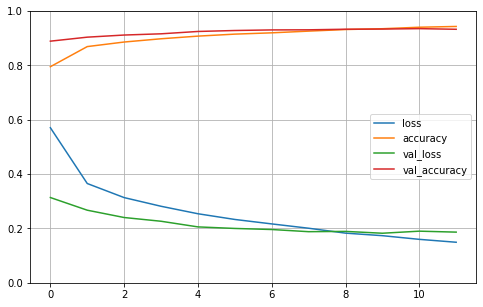

In [47]:
pd.DataFrame(history_bestmodel.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [48]:
start_time = time.time()

score = modelBE1.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))



Test loss: 0.21876509487628937
Test accuracy: 0.9247000217437744
Elapsed time: 0:00:05.14


### Bayes result

In [23]:
# MODEL BUILDING FUNCTION
def build_model2(hp):
    
    
    
    modelF = Sequential()

    modelF.add(Conv2D(filters=hp.Choice('num_filters_1',values=[32,64,96], default=64),
                     kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    modelF.add(Conv2D(filters=hp.Choice('num_filters_2',values=[64,128,256], default=128),
                      kernel_size=(3, 3), 
                      activation='relu'))   
    modelF.add(MaxPooling2D(pool_size=(2, 2), 
                            strides=(2,2)
                           )
              )
    modelF.add(Dropout(rate=hp.Float(
                        'dropout_1',
                        min_value=0.2, max_value=0.6, default=0.4, step=0.2)
                        ))
    modelF.add(Flatten())
    modelF.add(Dense(units=hp.Int('dense_units', 
                                  min_value = 64, 
                                  max_value=192, 
                                  step=64), 
                     activation=hp.Choice('dense_activation', values=['relu', 'tanh', 'sigmoid'])))

    modelF.add(Dropout(rate=hp.Float(
                        'dropout_2',
                        min_value=0.1, max_value=0.5, default=0.2, step=0.2)
                        ))
    modelF.add(Dense(num_classes, activation='softmax'))

    modelF.summary()
    modelF.compile(loss='categorical_crossentropy', 
                   optimizer=keras.optimizers.Adam(
                    hp.Float(
                        'learning_rate',
                        min_value=1e-4,
                        max_value=1e-2,
                        sampling='LOG',
                        default=1e-3
                    )
                    ),
#                   optimizer='adam',
                  metrics=['accuracy'])

    print("compiled")
    return modelF


In [26]:
print("#################################################################################")
print("################### BAYES MODEL #################################################")
print("#################################################################################")

start_time = time.time()


seed=42

tuner3 = BayesianOptimization(hypermodel=build_model2,
    objective='val_accuracy',                              
    max_trials=32,
    directory=os.path.normpath('C:/kerasloggs/'),
    project_name='umu_labb2_part2_bays',
    seed=seed,
    overwrite=True,
    executions_per_trial=1)
#    objective='val_loss',
#    max_trials=1,
#    num_initial_points=2, # Defaults to 3

print("Search space summary ************ BAYES ********************************************")
tuner3.search_space_summary()

#################################################################################
################### BAYES MODEL #################################################
#################################################################################
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
________

In [27]:
print("#################################################################################")
print("################### BAYES SEARCH ################################################")
print("#################################################################################")
epochs=15

early_stopping3 = EarlyStopping(
    patience=2,
    mode='auto')

tuner3.search(x_train, y_train,
          batch_size=batch_size,
          verbose=2,             
          epochs=epochs,
          validation_split=0.1,
          callbacks=[early_stopping3])


print("Search over")

models3 = tuner3.get_best_models(num_models=1)
best_model3 = models3[0]

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))


#################################################################################
################### BAYES SEARCH ################################################
#################################################################################
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        55360     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       36992     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 192)               3539136   
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        55360     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 192)               1769664   
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        55360     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 192)               1769664   
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        55360     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        55360     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 192)               1769664   
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        55360     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        55360     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 192)               1769664   
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        55360     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 192)               1769664   
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        55360     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 192)               1769664   
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 192)               3539136   
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 192)               3539136   
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 192)               3539136   
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 192)               3539136   
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        55360     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 192)               1769664   
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       221440    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       147712    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 192)               1769664   
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       147712    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 192)               3539136   
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       147712    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        55360     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 192)               1769664   
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       36992     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        55360     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

INFO:tensorflow:Oracle triggered exit
Search over
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 192)               3539136   
_________________________________________________________________
dropou

In [28]:
tuner3.results_summary()

In [29]:
print(best_model3.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 192)               3539136   
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0

The best model got the following parameters

Trial summary
|-Trial ID: 7442d216006765f215ff5450d8bac29e
|-Score: 0.930980384349823
|-Best step: 0

Hyperparameters:
|-dense_activation: relu
|-dense_units: 192
|-dropout_1: 0.4
|-dropout_2: 0.5000000000000001
|-learning_rate: 0.000929054401138158
|-num_filters_1: 96
|-num_filters_2: 128

Now create a model like that and fit it to get loss + acc graph

In [30]:
modelBE3 = Sequential()
modelBE3.add(Conv2D(96, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
modelBE3.add(Conv2D(128, (3, 3), activation='relu'))
modelBE3.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
modelBE3.add(Dropout(0.4))
modelBE3.add(Flatten())
modelBE3.add(Dense(192, activation='relu'))
modelBE3.add(Dropout(0.5))
modelBE3.add(Dense(num_classes, activation='softmax'))             
modelBE3.compile(loss='categorical_crossentropy', 
                   optimizer=keras.optimizers.Adam(
                        learning_rate=0.000929054401138158,
                       name='Adam'
                    ),
                  metrics=['accuracy'])


In [31]:
# Fit data to model
start_time = time.time()

early_stoppingBM3 = EarlyStopping(
    patience=2,
    mode='auto')

history_bestmodel3 = modelBE3.fit(x_train, y_train,
             batch_size=batch_size,
            epochs=epochs,
          verbose=2,             
            validation_split=0.1,
        callbacks=[early_stoppingBM3])

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))


Epoch 1/15
359/359 - 100s - loss: 0.5115 - accuracy: 0.8176 - val_loss: 0.3089 - val_accuracy: 0.8857
Epoch 2/15
359/359 - 100s - loss: 0.3310 - accuracy: 0.8801 - val_loss: 0.2779 - val_accuracy: 0.8969
Epoch 3/15
359/359 - 100s - loss: 0.2807 - accuracy: 0.8967 - val_loss: 0.2587 - val_accuracy: 0.9063
Epoch 4/15
359/359 - 100s - loss: 0.2452 - accuracy: 0.9097 - val_loss: 0.2442 - val_accuracy: 0.9163
Epoch 5/15
359/359 - 99s - loss: 0.2218 - accuracy: 0.9196 - val_loss: 0.2289 - val_accuracy: 0.9194
Epoch 6/15
359/359 - 100s - loss: 0.1988 - accuracy: 0.9264 - val_loss: 0.2229 - val_accuracy: 0.9214
Epoch 7/15
359/359 - 99s - loss: 0.1822 - accuracy: 0.9315 - val_loss: 0.2144 - val_accuracy: 0.9259
Epoch 8/15
359/359 - 99s - loss: 0.1653 - accuracy: 0.9380 - val_loss: 0.2203 - val_accuracy: 0.9261
Epoch 9/15
359/359 - 100s - loss: 0.1509 - accuracy: 0.9429 - val_loss: 0.2194 - val_accuracy: 0.9239
Elapsed time: 0:15:00.87


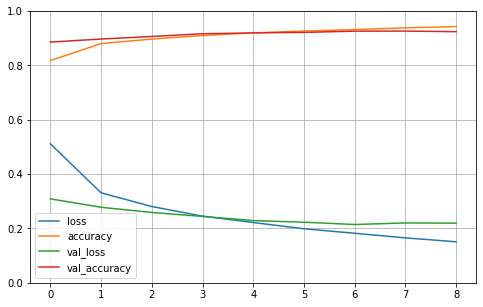

In [32]:
pd.DataFrame(history_bestmodel3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [33]:
start_time = time.time()

score = modelBE3.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))






Test loss: 0.22248147428035736
Test accuracy: 0.9211000204086304
Elapsed time: 0:00:05.26


#### Analysis

<b>Old Hyper parameters</b><br>

epochs = 12<br>
batch_size = 128<br>
Trial summary<br>
Hyperparameters:<br>
|-dense_activation: relu<br>
|-dense_units: 128<br>
|-dropout_1: 0.25<br>
|-dropout_2: 0.5<br>
|-learning_rate: Default<br>
|-num_filters_1: 32<br>
|-num_filters_2: 64<br>

<b>With Keras Tuning  RandomSearch</b><br>

epochs = 12<br>
batch_size = 128<br>
Trial summary<br>
Hyperparameters:<br>
|-dense_activation: relu<br>
|-dense_units: 128<br>
|-dropout_1: 0.4<br>
|-dropout_2: 0.5<br>
|-learning_rate: 0.0006475221645231884<br>
|-num_filters_1: 96<br>
|-num_filters_2: 128<br>

<b>With Keras Tuning  BayesianOptimization</b><br>

epochs = 12<br>
batch_size = 128<br>
Hyperparameters:<br>
|-dense_activation: relu<br>
|-dense_units: 192<br>
|-dropout_1: 0.4<br>
|-dropout_2: 0.5000000000000001<br>
|-learning_rate: 0.000929054401138158<br>
|-num_filters_1: 96<br>
|-num_filters_2: 128<br>


<b>First model with manual optimization</b><br>
&nbsp;&nbsp;&nbsp;    Test loss: 0.24315041303634644<br>
&nbsp;&nbsp;&nbsp;    Test accuracy: 0.9189000129699707<br>
&nbsp;&nbsp;&nbsp;    overfitting started after 8-9 epochs

<b>RandomSearch</b><br>
|-Score: 0.936470568180084<br>
&nbsp;&nbsp;&nbsp;    After making a model and fitting it, we got the following result<br>
&nbsp;&nbsp;&nbsp;    Test loss: 0.21876509487628937<br>
&nbsp;&nbsp;&nbsp;    Test accuracy: 0.9247000217437744<br>
&nbsp;&nbsp;&nbsp;    Overfitting started after 7 epochs<br>


<b>BayesianOptimization</b><br>
|-Score: 0.930980384349823<br>
&nbsp;&nbsp;&nbsp;    After making a model and fitting it, we got the following result<br>
&nbsp;&nbsp;&nbsp;    Test loss: 0.22248147428035736<br>
&nbsp;&nbsp;&nbsp;    Test accuracy: 0.9211000204086304<br>
&nbsp;&nbsp;&nbsp;    Overfitting started after 6 epochs<br>

<b>7 hyperparameters were used in the Keras Tuning.</b> Comparing the first model with the optimized through
RandomSearch (which was better than BayesianOptimization) we can see:<br>
&nbsp;&nbsp;&nbsp;    The improvement in accuracy went from 0,919 to 0,925<br>
&nbsp;&nbsp;&nbsp;    The loss went down from 0,243 to 0,219<br>
&nbsp;&nbsp;&nbsp;    Out of the 7 hyperparameters, only 2 were the same in both models<br>
Comparing Bayes to the first model, only 1 parameter was the same in both models<br>

It is difficult to draw conclusions about which parameter was more important, it tend to be that the combination is 
more important. The only parameter that was the same throughout the 3 models where the dense layer dropout rate of 0.5
However,<br>

<b>Looking at the ranges:</b><br>
Filter 1: 32-96<br>
Filter 2: 64-256<br>
Dropout1: 0,2-0,6<br>
Dropout2: 0,1-0,5<br>
Dense:  64-192<br>
Dense activation: 3 different<br>
Learning rate 0,01 - 0,0001<br>
<br>
The RandomSearch best result had a max value on filter 2 and on dropout 2, which could mean that there is another more optimal model if we would run tests with higher value on those parameters.

<b>Looking into the top-10 test results</b>. In the RandomSearch the second best result had a different activation funtion (sigmoid). In the Beyes, non of the top-10 results had different activation functions. Could that be because we hade to few test steps (32 in both Randon and Bayes)

<b>Just a note.</b>
In the Bayes, epoch of 15 were used due to curiosity, to see what would happen with the learning. <br>
However that did not help for the BeyesOptimization Tuning.


### VG Part

 We take the Random search best model and apply different number of convolution layers and dense layer. 
 Also, we try different number of neurons in the dense layers

In [15]:

# MODEL BUILDING FUNCTION
def build_modelL3(hp):
   
    
    modelL3 = Sequential()
    modelL3.add(Conv2D(96, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))

    # Choose different number of convolution layers (between 1 and 2)
    cnt = 0
    for i in range(hp.Int('num_conv_layers', 2, 3)):
        modelL3.add(Conv2D(128, (3, 3), activation='relu'))
        cnt = cnt + 1
        if i == 1:
            modelL3.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    
    modelL3.add(Dropout(0.4))
    modelL3.add(Flatten())

    # Choose different number of dense layers (between 2 and 4)
    for c in range(hp.Int('num_dense_layers', 2, 4)):  
        # Choose 3 different number of neurons, 2 that could be observed in the earlier test + 1 higher
        modelL3.add(Dense(units=hp.Int('dense_units', 
                                      min_value = 128, 
                                      max_value=256, 
                                      step=64), 
                         activation='relu'))
        # Add a dropout efter every Dense
        modelL3.add(Dropout(0.5))
        
    modelL3.add(Dense(num_classes, activation='softmax'))

    modelL3.summary()
    modelL3.compile(loss='categorical_crossentropy', 
                   optimizer=keras.optimizers.Adam(
                        learning_rate=0.0006475221645231884,
                       name='Adam'
                    ),
                  metrics=['accuracy'])

    print("compiled")
    return modelL3

In [16]:
# Make a tuner
tunerL3 = RandomSearch(
    build_modelL3,
    objective='val_accuracy',
    max_trials=32,
    executions_per_trial=1,
    project_name='umu_labb2_part2_vg',
    directory=os.path.normpath('C:/kerasloggs/')
    )

print("Search space summary ************ RANDOM ********************************************")
tunerL3.search_space_summary()

INFO:tensorflow:Reloading Oracle from existing project C:\kerasloggs\umu_labb2_part2_vg\oracle.json
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
______________________

In [17]:
# We change patience on early stopping to 0, to get fewer epochs per test

start_time = time.time()

early_stoppingL3 = EarlyStopping(
    patience=0,
    mode='auto')

tunerL3.search(x_train, y_train,
          batch_size=batch_size,
          verbose=2,             
          epochs=epochs,
          validation_split=0.1,
            callbacks=[early_stoppingL3])


print("Search over")

modelsL3 = tunerL3.get_best_models(num_models=1)
best_modelL3 = modelsL3[0]

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 128)         0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 128)         0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 128)         0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 192)               2

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         147584    
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         147584    
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 128)         0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 128)         0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         147584    
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         147584    
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         147584    
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

INFO:tensorflow:Oracle triggered exit
Search over
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
dropou

In [18]:
tunerL3.results_summary()

In [19]:
print(best_modelL3.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 128)         0

In [20]:
#Make the best model

modelLE3 = Sequential()
modelLE3.add(Conv2D(96, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
modelLE3.add(Conv2D(128, (3, 3), activation='relu'))
modelLE3.add(Conv2D(128, (3, 3), activation='relu'))
modelLE3.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
modelLE3.add(Conv2D(128, (3, 3), activation='relu'))
modelLE3.add(Conv2D(128, (3, 3), activation='relu'))
modelLE3.add(Dropout(0.4))
modelLE3.add(Flatten())
modelLE3.add(Dense(192, activation='relu'))
modelLE3.add(Dropout(0.5))
modelLE3.add(Dense(192, activation='relu'))
modelLE3.add(Dropout(0.5))
modelLE3.add(Dense(num_classes, activation='softmax'))             
modelLE3.compile(loss='categorical_crossentropy', 
                   optimizer=keras.optimizers.Adam(
                        learning_rate=0.0006475221645231884,
                       name='Adam'
                    ),
                  metrics=['accuracy'])


In [21]:
# Fit data to model
start_time = time.time()

early_stoppingLM3 = EarlyStopping(
    patience=0,
    mode='auto')

history_bestmodelL3 = modelLE3.fit(x_train, y_train,
             batch_size=batch_size,
            epochs=epochs,
          verbose=2,             
            validation_split=0.1,
        callbacks=[early_stoppingLM3])

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
359/359 - 182s - loss: 0.8223 - accuracy: 0.7020 - val_loss: 0.4593 - val_accuracy: 0.8388
Epoch 2/12
359/359 - 181s - loss: 0.4713 - accuracy: 0.8312 - val_loss: 0.3244 - val_accuracy: 0.8792
Epoch 3/12
359/359 - 181s - loss: 0.3725 - accuracy: 0.8700 - val_loss: 0.2814 - val_accuracy: 0.8914
Epoch 4/12
359/359 - 181s - loss: 0.3267 - accuracy: 0.8861 - val_loss: 0.2525 - val_accuracy: 0.9065
Epoch 5/12
359/359 - 181s - loss: 0.2967 - accuracy: 0.8980 - val_loss: 0.2362 - val_accuracy: 0.9092
Epoch 6/12
359/359 - 180s - loss: 0.2695 - accuracy: 0.9052 - val_loss: 0.2287 - val_accuracy: 0.9139
Epoch 7/12
359/359 - 180s - loss: 0.2477 - accuracy: 0.9136 - val_loss: 0.2183 - val_accuracy: 0.9190
Epoch 8/12
359/359 - 180s - loss: 0.2325 - accuracy: 0.9190 - val_loss: 0.2283 - val_accuracy: 0.9163
Elapsed time: 0:24:08.98


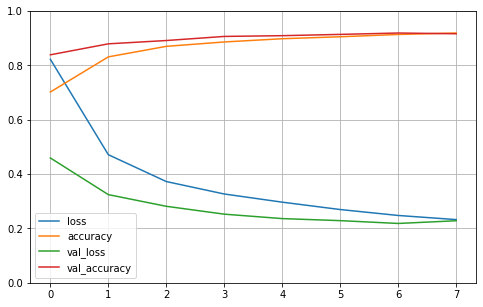

In [22]:
pd.DataFrame(history_bestmodelL3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [23]:
start_time = time.time()

score = modelLE3.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))


Test loss: 0.25789105892181396
Test accuracy: 0.910099983215332
Elapsed time: 0:00:09.46


###### Analysis on tuning Layers

In the first run there was a problem with the Convolution layers. The code output this error message<br>
<br>
"Problem with MaxPooling in the for loop<br>
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_4/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](max_pooling2d_2/MaxPool, conv2d_4/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,128], [3,3,128,128]."<br>
<br>
When doing maxpooling the input shapes quickly gets smaller, so I removed maxpooling after every conv layer, and only had one maxpooling.<br>

<b>The best model had these hyperparameters:</b><br>

Trial summary<br>
|-Trial ID: a7c9f06134ca80b8ddd251e4eaa07e0c<br>
|-Score: 0.930980384349823<br>
|-Best step: 0<br>
Hyperparameters:<br>
|-dense_units: 192<br>
|-num_conv_layers: 4<br>
|-num_dense_layers: 2<br>

So 4 convolution layers and 2 dense layers with 192 neurons/units each.<br>
<br>
Running the <b>best model from different layers</b> got these loss and accuracy values on the validation data<br>
|-Score: 0.930980384349823<br>
&nbsp;&nbsp;&nbsp;    Test loss: 0.25789105892181396<br>
&nbsp;&nbsp;&nbsp;    Test accuracy: 0.910099983215332<br>
<br>
Compared to the best model earlier<br><br>
<b>RandomSearch</b><br>
|-Score: 0.936470568180084<br>
&nbsp;&nbsp;&nbsp;    After making a model and fitting it, we got the following result<br>
&nbsp;&nbsp;&nbsp;    Test loss: 0.21876509487628937<br>
&nbsp;&nbsp;&nbsp;    Test accuracy: 0.9247000217437744<br>
<br>
So no improvement in this case, we have earlier found the best model with this setup of hyperparameter tuning
